In [3]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import sklearn
import datetime
import array 
import math

import shapefile as sf
from matplotlib.patches import Polygon
import mpld3

from pyproj import Proj
from censusgeocode import CensusGeocode
from matplotlib.collections import PatchCollection

In [9]:
filenames='aff/block_groups/*with_ann.csv'
aff_files=glob.glob(filenames)

In [11]:
additional_filenames =['aff/block_groups/language/ACS_14_5YR_B16002_with_ann.csv']

In [22]:
file_list = aff_files + additional_filenames
len(file_list)

35

In [23]:
#age = [0, 1]
#totals = [2]
#race = [10]
#income = [16, 17, 18, 19]
#propvals = [20, 24, 25, 28]
#geography = [33]

all_of_interest = [33, 0, 1, 4, 12, 18, 19, 20, 21, 22, 26, 27, 28, 31, 2, 3, 34]

In [24]:
census = pd.DataFrame()

In [26]:
for i in all_of_interest: 
    temp = pd.read_csv(file_list[i], header=1, low_memory=False)
    print i, i, i 
    if (i==33): 
        census = temp.copy()
    if (i!=33): 
        if (i==2): 
            temp.rename(columns={'Estimate; Median age -- - Total:': 'median_age_white'}, inplace=True)
        if (i==3): 
            temp.rename(columns={'Estimate; Median age -- - Total:': 'median_age_latin'}, inplace=True)

        combo = pd.merge(census, temp, on='Id', how='left', suffixes=('', '_' + str(i)))
        census = combo.copy()
        census.reset_index(drop=True)

33 33 33
0 0 0
1 1 1
4 4 4
12 12 12
18 18 18
19 19 19
20 20 20
21 21 21
22 22 22
26 26 26
27 27 27
28 28 28
31 31 31
2 2 2
3 3 3
34 34 34


In [27]:
census.rename(columns={'GEOGRAPHIC AREA CODES - Census Tract': 'tract', 
                               'GEOGRAPHIC AREA CODES - Block Group': 'blockgroup'}, inplace=True)

In [28]:
# trim out the one with no blockgroup at the end...
census = census.loc[:1793]

In [29]:
# Racial Breakdown: 
race_bkdwn = census[['Estimate; Not Hispanic or Latino: - White alone',
                             'Estimate; Not Hispanic or Latino: - Black or African American alone',
                             'Estimate; Not Hispanic or Latino: - American Indian and Alaska Native alone',
                             'Estimate; Not Hispanic or Latino: - Asian alone',
                             'Estimate; Not Hispanic or Latino: - Native Hawaiian and Other Pacific Islander alone',
                             'Estimate; Not Hispanic or Latino: - Some other race alone',
                             'Estimate; Not Hispanic or Latino: - Two or more races:',
                             'Estimate; Hispanic or Latino:']].copy()

race_sum = race_bkdwn.sum(axis=1)

census[['Estimate; Not Hispanic or Latino: - White alone',
                             'Estimate; Not Hispanic or Latino: - Black or African American alone',
                             'Estimate; Not Hispanic or Latino: - American Indian and Alaska Native alone',
                             'Estimate; Not Hispanic or Latino: - Asian alone',
                             'Estimate; Not Hispanic or Latino: - Native Hawaiian and Other Pacific Islander alone',
                             'Estimate; Not Hispanic or Latino: - Some other race alone',
                             'Estimate; Not Hispanic or Latino: - Two or more races:',
                             'Estimate; Hispanic or Latino:']] = race_bkdwn.div(race_sum, axis=0)

In [30]:
# Age Breakdown (Male): 
age_bkdwn = census[[
       'Estimate; Male: - Under 5 years', 'Estimate; Male: - 5 to 9 years',
       'Estimate; Male: - 10 to 14 years',
       'Estimate; Male: - 15 to 17 years',
       'Estimate; Male: - 18 and 19 years', 'Estimate; Male: - 20 years',
       'Estimate; Male: - 21 years', 'Estimate; Male: - 22 to 24 years',
       'Estimate; Male: - 25 to 29 years',
       'Estimate; Male: - 30 to 34 years',
       'Estimate; Male: - 35 to 39 years',
       'Estimate; Male: - 40 to 44 years',
       'Estimate; Male: - 45 to 49 years',
       'Estimate; Male: - 50 to 54 years',
       'Estimate; Male: - 55 to 59 years',
       'Estimate; Male: - 60 and 61 years',
       'Estimate; Male: - 62 to 64 years',
       'Estimate; Male: - 65 and 66 years',
       'Estimate; Male: - 67 to 69 years',
       'Estimate; Male: - 70 to 74 years',
       'Estimate; Male: - 75 to 79 years',
       'Estimate; Male: - 80 to 84 years',
       'Estimate; Male: - 85 years and over']].copy()

age_sum = age_bkdwn.sum(axis=1)

census[[
       'Estimate; Male: - Under 5 years', 'Estimate; Male: - 5 to 9 years',
       'Estimate; Male: - 10 to 14 years',
       'Estimate; Male: - 15 to 17 years',
       'Estimate; Male: - 18 and 19 years', 'Estimate; Male: - 20 years',
       'Estimate; Male: - 21 years', 'Estimate; Male: - 22 to 24 years',
       'Estimate; Male: - 25 to 29 years',
       'Estimate; Male: - 30 to 34 years',
       'Estimate; Male: - 35 to 39 years',
       'Estimate; Male: - 40 to 44 years',
       'Estimate; Male: - 45 to 49 years',
       'Estimate; Male: - 50 to 54 years',
       'Estimate; Male: - 55 to 59 years',
       'Estimate; Male: - 60 and 61 years',
       'Estimate; Male: - 62 to 64 years',
       'Estimate; Male: - 65 and 66 years',
       'Estimate; Male: - 67 to 69 years',
       'Estimate; Male: - 70 to 74 years',
       'Estimate; Male: - 75 to 79 years',
       'Estimate; Male: - 80 to 84 years',
       'Estimate; Male: - 85 years and over']] = age_bkdwn.div(age_sum, axis=0)

In [31]:
# Age Breakdown (Female): 
age_bkdwn = census[[
       'Estimate; Female: - Under 5 years', 'Estimate; Female: - 5 to 9 years',
       'Estimate; Female: - 10 to 14 years',
       'Estimate; Female: - 15 to 17 years',
       'Estimate; Female: - 18 and 19 years', 'Estimate; Female: - 20 years',
       'Estimate; Female: - 21 years', 'Estimate; Female: - 22 to 24 years',
       'Estimate; Female: - 25 to 29 years',
       'Estimate; Female: - 30 to 34 years',
       'Estimate; Female: - 35 to 39 years',
       'Estimate; Female: - 40 to 44 years',
       'Estimate; Female: - 45 to 49 years',
       'Estimate; Female: - 50 to 54 years',
       'Estimate; Female: - 55 to 59 years',
       'Estimate; Female: - 60 and 61 years',
       'Estimate; Female: - 62 to 64 years',
       'Estimate; Female: - 65 and 66 years',
       'Estimate; Female: - 67 to 69 years',
       'Estimate; Female: - 70 to 74 years',
       'Estimate; Female: - 75 to 79 years',
       'Estimate; Female: - 80 to 84 years',
       'Estimate; Female: - 85 years and over']].copy()

age_sum = age_bkdwn.sum(axis=1)

census[[
       'Estimate; Female: - Under 5 years', 'Estimate; Female: - 5 to 9 years',
       'Estimate; Female: - 10 to 14 years',
       'Estimate; Female: - 15 to 17 years',
       'Estimate; Female: - 18 and 19 years', 'Estimate; Female: - 20 years',
       'Estimate; Female: - 21 years', 'Estimate; Female: - 22 to 24 years',
       'Estimate; Female: - 25 to 29 years',
       'Estimate; Female: - 30 to 34 years',
       'Estimate; Female: - 35 to 39 years',
       'Estimate; Female: - 40 to 44 years',
       'Estimate; Female: - 45 to 49 years',
       'Estimate; Female: - 50 to 54 years',
       'Estimate; Female: - 55 to 59 years',
       'Estimate; Female: - 60 and 61 years',
       'Estimate; Female: - 62 to 64 years',
       'Estimate; Female: - 65 and 66 years',
       'Estimate; Female: - 67 to 69 years',
       'Estimate; Female: - 70 to 74 years',
       'Estimate; Female: - 75 to 79 years',
       'Estimate; Female: - 80 to 84 years',
       'Estimate; Female: - 85 years and over']] = age_bkdwn.div(age_sum, axis=0)

In [32]:
income_bkdwn=census[['Estimate; Total: - Less than $10,000',
       'Estimate; Total: - $10,000 to $14,999',
       'Estimate; Total: - $15,000 to $19,999',
       'Estimate; Total: - $20,000 to $24,999',
       'Estimate; Total: - $25,000 to $29,999',
       'Estimate; Total: - $30,000 to $34,999',
       'Estimate; Total: - $35,000 to $39,999',
       'Estimate; Total: - $40,000 to $44,999',
       'Estimate; Total: - $45,000 to $49,999',
       'Estimate; Total: - $50,000 to $59,999',
       'Estimate; Total: - $60,000 to $74,999',
       'Estimate; Total: - $75,000 to $99,999',
       'Estimate; Total: - $100,000 to $124,999',
       'Estimate; Total: - $125,000 to $149,999',
       'Estimate; Total: - $150,000 to $199,999',
       'Estimate; Total: - $200,000 or more']].copy()

income_sum = income_bkdwn.sum(axis=1)

census[['Estimate; Total: - Less than $10,000',
       'Estimate; Total: - $10,000 to $14,999',
       'Estimate; Total: - $15,000 to $19,999',
       'Estimate; Total: - $20,000 to $24,999',
       'Estimate; Total: - $25,000 to $29,999',
       'Estimate; Total: - $30,000 to $34,999',
       'Estimate; Total: - $35,000 to $39,999',
       'Estimate; Total: - $40,000 to $44,999',
       'Estimate; Total: - $45,000 to $49,999',
       'Estimate; Total: - $50,000 to $59,999',
       'Estimate; Total: - $60,000 to $74,999',
       'Estimate; Total: - $75,000 to $99,999',
       'Estimate; Total: - $100,000 to $124,999',
       'Estimate; Total: - $125,000 to $149,999',
       'Estimate; Total: - $150,000 to $199,999',
       'Estimate; Total: - $200,000 or more'
       ]] = income_bkdwn.div(income_sum, axis=0)

In [33]:
rent_bkdwn=census[['Estimate; With cash rent: - Less than $100',
       'Estimate; With cash rent: - $100 to $149',
       'Estimate; With cash rent: - $150 to $199',
       'Estimate; With cash rent: - $200 to $249',
       'Estimate; With cash rent: - $250 to $299',
       'Estimate; With cash rent: - $300 to $349',
       'Estimate; With cash rent: - $350 to $399',
       'Estimate; With cash rent: - $400 to $449',
       'Estimate; With cash rent: - $450 to $499',
       'Estimate; With cash rent: - $500 to $549',
       'Estimate; With cash rent: - $550 to $599',
       'Estimate; With cash rent: - $600 to $649',
       'Estimate; With cash rent: - $650 to $699',
       'Estimate; With cash rent: - $700 to $749',
       'Estimate; With cash rent: - $750 to $799',
       'Estimate; With cash rent: - $800 to $899',
       'Estimate; With cash rent: - $900 to $999',
       'Estimate; With cash rent: - $1,000 to $1,249',
       'Estimate; With cash rent: - $1,250 to $1,499',
       'Estimate; With cash rent: - $1,500 to $1,999',
       'Estimate; With cash rent: - $2,000 or more']].copy()

rent_sum = rent_bkdwn.sum(axis=1)

census[['Estimate; With cash rent: - Less than $100',
       'Estimate; With cash rent: - $100 to $149',
       'Estimate; With cash rent: - $150 to $199',
       'Estimate; With cash rent: - $200 to $249',
       'Estimate; With cash rent: - $250 to $299',
       'Estimate; With cash rent: - $300 to $349',
       'Estimate; With cash rent: - $350 to $399',
       'Estimate; With cash rent: - $400 to $449',
       'Estimate; With cash rent: - $450 to $499',
       'Estimate; With cash rent: - $500 to $549',
       'Estimate; With cash rent: - $550 to $599',
       'Estimate; With cash rent: - $600 to $649',
       'Estimate; With cash rent: - $650 to $699',
       'Estimate; With cash rent: - $700 to $749',
       'Estimate; With cash rent: - $750 to $799',
       'Estimate; With cash rent: - $800 to $899',
       'Estimate; With cash rent: - $900 to $999',
       'Estimate; With cash rent: - $1,000 to $1,249',
       'Estimate; With cash rent: - $1,250 to $1,499',
       'Estimate; With cash rent: - $1,500 to $1,999',
       'Estimate; With cash rent: - $2,000 or more']] = rent_bkdwn.div(rent_sum, axis=0)

In [34]:
pa_sum = census[['Estimate; Total: - With public assistance income', 'Estimate; Total: - No public assistance income']].sum(axis=1)
census[['Estimate; Total: - With public assistance income', 'Estimate; Total: - No public assistance income']] = census[['Estimate; Total: - With public assistance income', 'Estimate; Total: - No public assistance income']].div(pa_sum, axis=0)

occ_sum = census[['Estimate; Total: - Owner occupied','Estimate; Total: - Renter occupied']].sum(axis=1)
census[['Estimate; Total: - Owner occupied','Estimate; Total: - Renter occupied']] = census[['Estimate; Total: - Owner occupied','Estimate; Total: - Renter occupied']].div(occ_sum, axis=0)

In [35]:
census.drop('Estimate; Not Hispanic or Latino: - Two or more races: - Two races including Some other race',1, inplace=True)
census.drop('Estimate; Not Hispanic or Latino: - Two or more races: - Two races excluding Some other race, and three or more races', 1, inplace=True)

In [36]:
# Age ranges (Male): 
census['male_5_17'] = census[['Estimate; Male: - Under 5 years',
                                              'Estimate; Male: - 5 to 9 years',
                                              'Estimate; Male: - 10 to 14 years',
                                              'Estimate; Male: - 15 to 17 years']].sum(axis=1)
census['male_18_29'] = census[['Estimate; Male: - 18 and 19 years', 
                                               'Estimate; Male: - 20 years',
                                               'Estimate; Male: - 21 years', 
                                               'Estimate; Male: - 22 to 24 years',
                                               'Estimate; Male: - 25 to 29 years']].sum(axis=1)
census['male_30_60'] = census[['Estimate; Male: - 30 to 34 years',
                                               'Estimate; Male: - 35 to 39 years',
                                               'Estimate; Male: - 40 to 44 years',
                                               'Estimate; Male: - 45 to 49 years',
                                               'Estimate; Male: - 50 to 54 years',
                                               'Estimate; Male: - 55 to 59 years']].sum(axis=1)
census['male_61plus'] = census[['Estimate; Male: - 60 and 61 years',
                                                'Estimate; Male: - 62 to 64 years',
                                                'Estimate; Male: - 65 and 66 years',
                                                'Estimate; Male: - 67 to 69 years',
                                                'Estimate; Male: - 70 to 74 years',
                                                'Estimate; Male: - 75 to 79 years',
                                                'Estimate; Male: - 80 to 84 years',
                                                'Estimate; Male: - 85 years and over']].sum(axis=1)

In [37]:
# Age ranges (Female): 
census['female_5_17'] = census[['Estimate; Female: - Under 5 years',
                                              'Estimate; Female: - 5 to 9 years',
                                              'Estimate; Female: - 10 to 14 years',
                                              'Estimate; Female: - 15 to 17 years']].sum(axis=1)
census['female_18_29'] = census[['Estimate; Female: - 18 and 19 years', 
                                               'Estimate; Female: - 20 years',
                                               'Estimate; Female: - 21 years', 
                                               'Estimate; Female: - 22 to 24 years',
                                               'Estimate; Female: - 25 to 29 years']].sum(axis=1)
census['female_30_60'] = census[['Estimate; Female: - 30 to 34 years',
                                               'Estimate; Female: - 35 to 39 years',
                                               'Estimate; Female: - 40 to 44 years',
                                               'Estimate; Female: - 45 to 49 years',
                                               'Estimate; Female: - 50 to 54 years',
                                               'Estimate; Female: - 55 to 59 years']].sum(axis=1)
census['female_61plus'] = census[['Estimate; Female: - 60 and 61 years',
                                                'Estimate; Female: - 62 to 64 years',
                                                'Estimate; Female: - 65 and 66 years',
                                                'Estimate; Female: - 67 to 69 years',
                                                'Estimate; Female: - 70 to 74 years',
                                                'Estimate; Female: - 75 to 79 years',
                                                'Estimate; Female: - 80 to 84 years',
                                                'Estimate; Female: - 85 years and over']].sum(axis=1)

In [38]:
# Rent ranges 
census['rent_0_500'] = census[['Estimate; With cash rent: - Less than $100',
                                               'Estimate; With cash rent: - $100 to $149',
                                               'Estimate; With cash rent: - $150 to $199',
                                               'Estimate; With cash rent: - $200 to $249',
                                               'Estimate; With cash rent: - $250 to $299',
                                               'Estimate; With cash rent: - $300 to $349',
                                               'Estimate; With cash rent: - $350 to $399',
                                               'Estimate; With cash rent: - $400 to $449',
                                               'Estimate; With cash rent: - $450 to $499']].sum(axis=1)
census['rent_501_1000'] = census[['Estimate; With cash rent: - $500 to $549',
       'Estimate; With cash rent: - $550 to $599',
       'Estimate; With cash rent: - $600 to $649',
       'Estimate; With cash rent: - $650 to $699',
       'Estimate; With cash rent: - $700 to $749',
       'Estimate; With cash rent: - $750 to $799',
       'Estimate; With cash rent: - $800 to $899',
       'Estimate; With cash rent: - $900 to $999']].sum(axis=1)
census['rent_1000plus'] = census[['Estimate; With cash rent: - $1,000 to $1,249',
       'Estimate; With cash rent: - $1,250 to $1,499',
       'Estimate; With cash rent: - $1,500 to $1,999',
       'Estimate; With cash rent: - $2,000 or more']].sum(axis=1)

In [39]:
census['income_0_25'] = census[['Estimate; Total: - Less than $10,000',
       'Estimate; Total: - $10,000 to $14,999',
       'Estimate; Total: - $15,000 to $19,999',
       'Estimate; Total: - $20,000 to $24,999']].sum(axis=1)
census['income_25_50'] = census[['Estimate; Total: - $25,000 to $29,999',
       'Estimate; Total: - $30,000 to $34,999',
       'Estimate; Total: - $35,000 to $39,999',
       'Estimate; Total: - $40,000 to $44,999',
       'Estimate; Total: - $45,000 to $49,999']].sum(axis=1)
census['income_50_100'] = census[['Estimate; Total: - $50,000 to $59,999',
       'Estimate; Total: - $60,000 to $74,999',
       'Estimate; Total: - $75,000 to $99,999']].sum(axis=1)
census['income_100_150'] = census[['Estimate; Total: - $100,000 to $124,999',
       'Estimate; Total: - $125,000 to $149,999']].sum(axis=1)
census['income_150plus'] = census[['Estimate; Total: - $150,000 to $199,999',
       'Estimate; Total: - $200,000 or more']].sum(axis=1)

In [40]:
census.rename(columns={'Estimate; Not Hispanic or Latino: - White alone': 'white_per', 
                               'Estimate; Not Hispanic or Latino: - Black or African American alone': 'baa_per', 
                               'Estimate; Not Hispanic or Latino: - American Indian and Alaska Native alone': 'aian_per', 
                               'Estimate; Not Hispanic or Latino: - Asian alone': 'asian_per', 
                               'Estimate; Not Hispanic or Latino: - Native Hawaiian and Other Pacific Islander alone': 'pi_per', 
                               'Estimate; Not Hispanic or Latino: - Some other race alone': 'other_per', 
                               'Estimate; Not Hispanic or Latino: - Two or more races:': 'tp_per', 
                               'Estimate; Hispanic or Latino:': 'latin_per'}, inplace=True)

census.rename(columns={'Estimate; Total: - With public assistance income': 'publica_per', 
                               'Estimate; Total: - Owner occupied': 'ownerocc_per'}, inplace=True)



In [41]:
census.rename(columns={'Estimate; Median household income in the past 12 months (in 2014 Inflation-adjusted dollars)': 'median_house_income', 
                       'Estimate; Median year structure built': 'median_structure_year', 
                       'Estimate; Median value (dollars)': 'median_home_value', 
                       'Estimate; Median contract rent': 'median_contract_rent'}, inplace=True)

In [42]:
census['median_house_income'].replace({'-': '-1'}, regex=True, inplace=True) 
census['median_house_income'].replace({'\+': ''}, regex=True, inplace=True) 
census['median_house_income'].replace({',': ''}, regex=True, inplace=True) 

In [48]:
census['median_home_value'].replace({'-': '-1'}, regex=True, inplace=True) 
census['median_home_value'].replace({'\+': ''}, regex=True, inplace=True) 
census['median_home_value'].replace({',': ''}, regex=True, inplace=True) 

census['median_home_value'].replace({'000-1': '000'}, regex=True, inplace=True)

In [44]:
census['median_contract_rent'].replace({'-': '-1'}, regex=True, inplace=True) 
census['median_contract_rent'].replace({'\+': ''}, regex=True, inplace=True) 
census['median_contract_rent'].replace({',': ''}, regex=True, inplace=True) 

In [45]:
census['median_age_white'].replace({'-': '-1'}, regex=True, inplace=True)

In [46]:
census['median_age_latin'].replace({'-': '-1'}, regex=True, inplace=True)

In [51]:
census['median_home_value'] = census['median_home_value'].astype(float)
census['median_age_white'] = census['median_age_white'].astype(float)
census['median_age_latin'] = census['median_age_latin'].astype(float)
census['median_contract_rent'] = census['median_contract_rent'].astype(float)
census['median_house_income'] = census['median_house_income'].astype(int)
census['tract'] = census.loc[:,'tract'].astype(float)
census['blockgroup'] = census.loc[:,'blockgroup'].astype(float)

In [56]:
#census[['Estimate; Total:_34']]

In [63]:
## Investigate Language breakdown
census['limited_english_households_per'] = (
    census[['Estimate; Total: - Spanish: - Limited English speaking household', 
        'Estimate; Total: - Other Indo-European languages: - Limited English speaking household',
        'Estimate; Total: - Asian and Pacific Island languages: - Limited English speaking household',
        'Estimate; Total: - Other languages: - Limited English speaking household']].sum(axis=1) / 
    census['Estimate; Total:_34'])

In [66]:
census['limited_english_households_spanish_per'] = (
    census['Estimate; Total: - Spanish: - Limited English speaking household'] 
    / census['Estimate; Total:_34'])

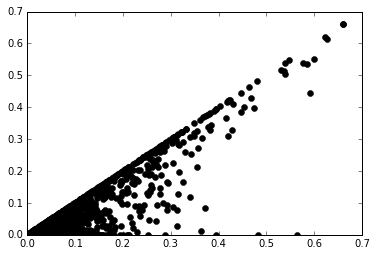

In [69]:
plt.plot(census['limited_english_households_per'], 
         census['limited_english_households_spanish_per'], 'ko')

In [73]:
census.rename(columns={'Estimate; Median age -- - Total:': 'median_age'}, inplace=True)

In [74]:
census_trimmed = census[['tract', 'blockgroup', 'male_5_17', 'male_18_29', 'male_30_60', 'male_61plus',
       'female_5_17', 'female_18_29', 'female_30_60', 'female_61plus',
       'rent_0_500', 'rent_501_1000', 'rent_1000plus', 'income_0_25',
       'income_25_50', 'income_50_100', 'income_100_150', 'income_150plus', 
                                'white_per', 'baa_per', 'aian_per', 'asian_per', 'pi_per', 
                                'other_per', 'tp_per', 'latin_per', 'publica_per', 'ownerocc_per', 
                        'median_house_income', 'median_structure_year', 'median_home_value', 
                        'median_age', 
                        'median_age_white', 'median_age_latin', 'median_contract_rent', 
                        'limited_english_households_per', 'limited_english_households_spanish_per']]

In [75]:
#census_trimmed.to_csv('output_files/census_trimmed_0917.csv', index=False)

In [72]:
census.columns.values

array(['Id', 'Id2', 'Geography', 'RECORD CODES - File Identification',
       'RECORD CODES - State/US-Abbreviation (USPS)',
       'RECORD CODES - Summary Level',
       'RECORD CODES - Geographic Component',
       'RECORD CODES - Characteristic Iteration',
       'RECORD CODES - Characteristic Iteration File Sequence Number',
       'RECORD CODES - Logical Record Number',
       'GEOGRAPHIC AREA CODES - Region',
       'GEOGRAPHIC AREA CODES - Division',
       'GEOGRAPHIC AREA CODES - State (FIPS)',
       'GEOGRAPHIC AREA CODES - County',
       'GEOGRAPHIC AREA CODES - FIPS County Class Code',
       'GEOGRAPHIC AREA CODES - County Size Code',
       'GEOGRAPHIC AREA CODES - County Subdivision (FIPS)',
       'GEOGRAPHIC AREA CODES - FIPS County Subdivision Class Code',
       'GEOGRAPHIC AREA CODES - County Subdivision Size Code',
       'GEOGRAPHIC AREA CODES - Place (FIPS)',
       'GEOGRAPHIC AREA CODES - FIPS Place Class Code',
       'GEOGRAPHIC AREA CODES - Place Size Code